In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [3]:
cube_df = pd.read_csv("./data/cube.csv")
train_df = cube_df[["x", "y", "z"]]
train_df.head()

,x,y,z
0,0.187781,0.239537,0.382492
1,-1.308979,-0.143321,-0.966648
2,-0.987613,0.679918,-0.037552
3,0.924980,0.607235,-0.146856
4,-0.098663,0.004329,-0.588876


In [4]:
train_input = train_df.values
train_input.shape

(1200, 3)

In [110]:
import itertools

In [170]:
def grid_coordinates(m: int, n: int) -> np.ndarray:
    """Returns the array of shape (m, n, 2) that represenst the grid/latice coordinates"""
    return np.array(list(itertools.product(np.arange(m),np.arange(n))))

In [186]:
def latice_distance(u: np.ndarray, v: np.ndarray):
    """Computes the euclidian distance between square grid points"""
    diff = u - v 
    return np.sum(diff**2, axis=-1)

In [187]:
@np.vectorize
def convert_grid_to_axial(i, j):
    q = i - (j - (j&1)) / 2
    r = j
    return q, r

In [188]:
def axial_hexgrid_coordinates(m: int, n: int) -> np.ndarray:
    """Returns the array of shape m, n, 2 that represent the hexgrid in axial coordinates"""
    xs, ys = np.fromfunction(convert_grid_to_axial, (m, n), dtype=int)
    return np.dstack((xs, ys))

In [ ]:
def axial_distance

In [185]:
axial_hexgrid = axial_hexgrid_coordinates(3, 3)
U = 
axial_hexgrid - convert_grid_to_axial(1, 1)


array([[[-1., -1.],
        [-1.,  0.],
        [-2.,  1.]],

       [[ 0., -1.],
        [ 0.,  0.],
        [-1.,  1.]],

       [[ 1., -1.],
        [ 1.,  0.],
        [ 0.,  1.]]])

In [169]:
z[0, 2]

array([-1.,  2.])

In [ ]:
# function oddr_to_axial(hex):
#     var q = hex.col - (hex.row - (hex.row&1)) / 2
#     var r = hex.row
#     return Hex(q, r)

In [142]:

def generator(i,j):
    return i, j
a, b = np.fromfunction(generator, (4, 6))
np.dstack((a, b))

array([[[0., 0.],
        [0., 1.],
        [0., 2.],
        [0., 3.],
        [0., 4.],
        [0., 5.]],

       [[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.]],

       [[2., 0.],
        [2., 1.],
        [2., 2.],
        [2., 3.],
        [2., 4.],
        [2., 5.]],

       [[3., 0.],
        [3., 1.],
        [3., 2.],
        [3., 3.],
        [3., 4.],
        [3., 5.]]])

In [69]:
"""Neighborhood functions"""
def circle(distances: np.ndarray, radius: float = 1):
    return (distances <= radius) * 1

def gaussian(distances: np.ndarray, radius: float = 1):
    t = (distances / radius)**2
    return np.exp(-t/2)

def mexican_hat(distances: np.ndarray, radius: float = 1):
    t = (distances / radius)**2
    return (1 - t)*np.exp(-t/2)

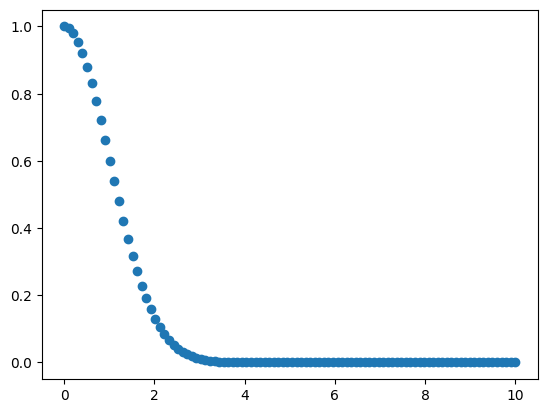

In [77]:
x = np.linspace(0, 10, 100)
plt.scatter(x, gaussian(x))

# Config

In [60]:
from functools import partial

In [8]:
OBSERVATION_NUM, FEATURE_DIM = train_input.shape 

MAP_M = 10
MAP_N = 10
MAP_SHAPE = (MAP_M, MAP_N)
TOTAL_EPOCHS = 100

NEIGHTBORHOOD_FUNCTION = partial(gaussian, width=0.5)

LEARNING_RATE_BASE = 1e-1

# Model and iterations

In [9]:
def learning_rate_scheduler(current_epoch: int):
    decay_rate = np.exp(-current_epoch / TOTAL_EPOCHS)
    return LEARNING_RATE_BASE * decay_rate

In [10]:
map_weights = np.random.rand(*MAP_SHAPE, FEATURE_DIM)

for current_epoch in tqdm(range(TOTAL_EPOCHS)):
    # Learning rate
    learning_rate = learning_rate_scheduler(current_epoch)
    
    for point_idx in range(OBSERVATION_NUM):

        data_vector = train_input[point_idx]
        
        # Winner
        latent_dist = map_weights @ data_vector
        bmu = np.unravel_index(np.argmax(latent_dist), MAP_SHAPE)

        # Neighborhood
        @np.vectorize
        def neightborhood_generator(i, j):
            dist_sq = euclidian_distance(
                np.asarray(bmu),
                np.asarray([i, j])
            )
            return NEIGHTBORHOOD_FUNCTION(dist_sq)

        neightborhood = np.fromfunction(
            neightborhood_generator, MAP_SHAPE
        ).reshape(*MAP_SHAPE, 1)

        # Update weights
        map_weights += learning_rate * neightborhood * (data_vector - map_weights)

  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: >

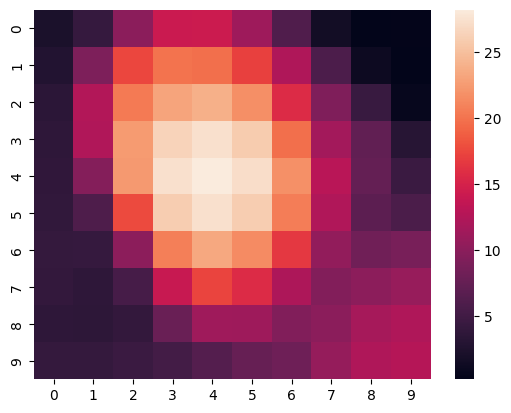

In [11]:
scale_map = np.sum(map_weights**2, axis=-1)
sns.heatmap(scale_map)

<Axes: >

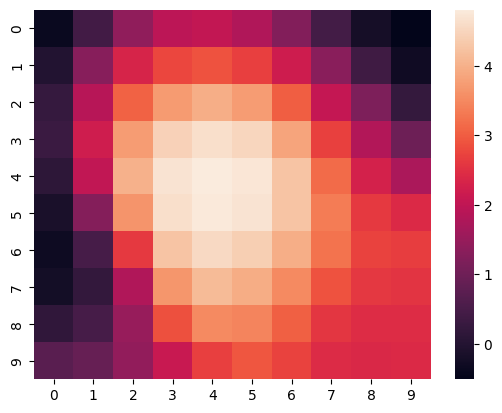

In [21]:
sns.heatmap(map_weights @ train_input[3])

In [22]:
from collections import defaultdict

In [23]:
a = (map_weights @ train_input.T).T

bmus = set()
for i in range(a.shape[0]):
    bmu = np.unravel_index(np.argmax(a[i, :, :]), MAP_SHAPE)
    bmus.add(bmu)

In [24]:
len(bmus)

29

In [25]:
bmus_list = list(bmus)
cluster_ids = []
for i in range(a.shape[0]):
    bmu = np.unravel_index(np.argmax(a[i, :, :]), MAP_SHAPE)
    cluster_ids.append(
        bmus_list.index(bmu)
    )

In [17]:
cube_df["som"] = cluster_ids
for i in range(8):
    df_slice = cube_df[cube_df["c"] == i]
    unique = df_slice["som"].unique()
    print(f"Class {i} -> SOM classes: {unique}")

Class 0 -> SOM classes: [20 21  0 11 14  2  5 15 22 27 23 12 24  6 19  1 28 25  7  4  9 13 17  3
 16  8 26]
Class 1 -> SOM classes: [13  6 20  9 22 24  3]
Class 2 -> SOM classes: [ 2 17 20  1 18 10]
Class 3 -> SOM classes: [20]
Class 4 -> SOM classes: [27 22 20 17  2 15  1 10 14]
Class 5 -> SOM classes: [20 22  9]
Class 6 -> SOM classes: [17  2  1 20 10]
Class 7 -> SOM classes: [20]


In [26]:
bmus_list[20]

(4, 4)